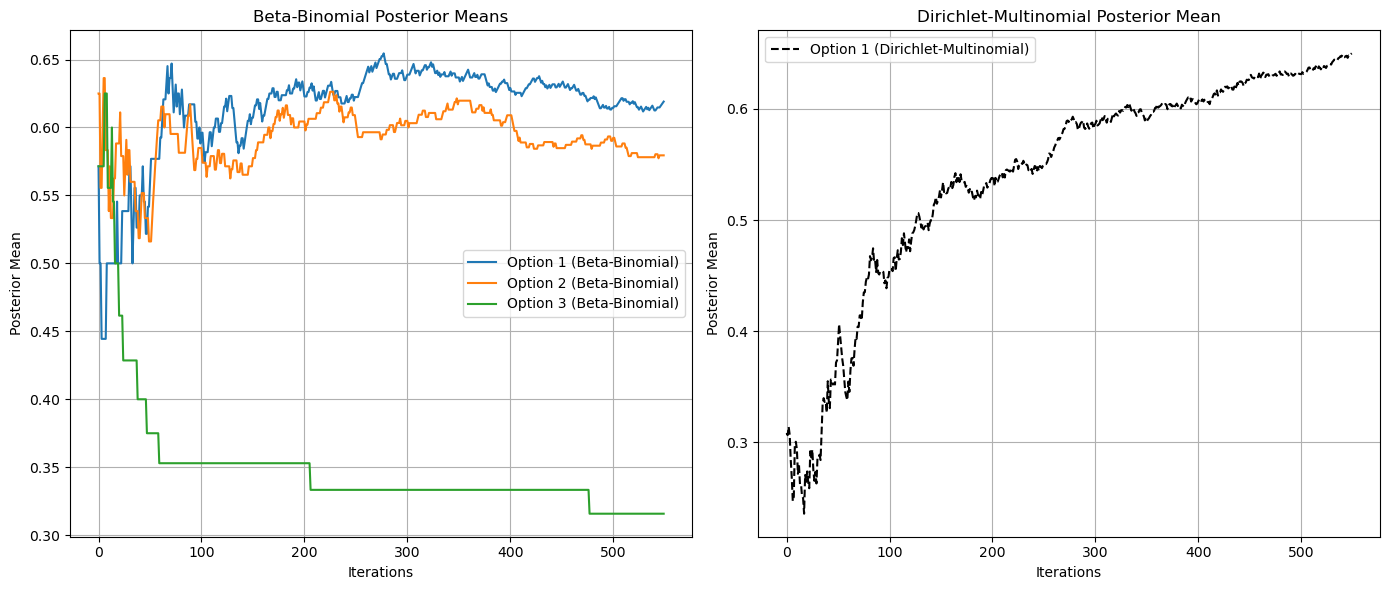


CONCLUSION:
In this simulation, we compared two approaches to posterior estimation: Independent Beta-Binomial and Joint Dirichlet-Multinomial analysis.
1. The Independent Beta-Binomial method tracks the performance of each entity separately, allowing for individual posterior estimates for each option.
2. The Joint Dirichlet-Multinomial method considers all options jointly, estimating their relative probabilities within the same model.

Key Observations:
- The Beta-Binomial analysis provides distinct posterior curves for each option, reflecting independent updates based on observed successes and failures.
- The Dirichlet-Multinomial analysis generates a single curve for the selected option (Entity 1 in this case), showing the aggregated posterior belief under the joint model.

These results demonstrate how Bayesian methods can be adapted to different experimental designs, balancing simplicity (Beta-Binomial) with interdependence modeling (Dirichlet-Multinomial). This framework is usefu

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# True probabilities for the three options
success_probs = [0.62, 0.53, 0.48]  # Adjusted true probabilities for each option

# Bayesian prior parameters for Beta distributions
prior_alpha = [4, 4, 4]  # Alpha values for prior beliefs
prior_beta = [3, 3, 3]   # Beta values for prior beliefs

# Initialize counters for trials and successes
total_attempts = np.zeros(3, dtype=int)  # Trials for each option
successful_attempts = np.zeros(3, dtype=int)  # Successes for each option

# Simulation settings
steps = 550               # Number of iterations
monte_carlo_samples = 950  # Monte Carlo sample size for posterior estimation
small_constant = 1e-6      # Small constant for stability in Dirichlet calculations

# Data storage for posterior means
beta_means = [[] for _ in range(3)]  # For independent Beta-Binomial analysis
dirichlet_means = []                 # For Joint Dirichlet-Multinomial analysis

# Simulation loop
for t in range(steps):
    # ----- Independent Beta-Binomial Analysis -----
    # Sample theta values for each option from Beta distributions
    beta_samples = [
        beta.rvs(prior_alpha[i] + successful_attempts[i],
                 prior_beta[i] + total_attempts[i] - successful_attempts[i],
                 size=monte_carlo_samples)
        for i in range(3)
    ]

    # Compute probabilities of each being the best
    prob_first_best = np.mean((beta_samples[0] > beta_samples[1]) & (beta_samples[0] > beta_samples[2]))
    prob_second_best = np.mean((beta_samples[1] > beta_samples[0]) & (beta_samples[1] > beta_samples[2]))

    # Choose the next option to test
    rand = np.random.rand()
    if rand < prob_first_best:
        selected_option = 0
    elif rand < prob_first_best + prob_second_best:
        selected_option = 1
    else:
        selected_option = 2

    # Simulate an outcome for the selected option
    trial_success = np.random.rand() < success_probs[selected_option]
    total_attempts[selected_option] += 1
    successful_attempts[selected_option] += int(trial_success)

    # Record posterior means for independent Beta distributions
    for i in range(3):
        updated_alpha = prior_alpha[i] + successful_attempts[i]
        updated_beta = prior_beta[i] + total_attempts[i] - successful_attempts[i]
        beta_means[i].append(updated_alpha / (updated_alpha + updated_beta))

    # ----- Joint Dirichlet-Multinomial Analysis -----
    # Calculate parameters for Dirichlet distribution
    dirichlet_params = [
        prior_alpha[i] + successful_attempts[i] + small_constant
        for i in range(3)
    ]

    # Sample from the Dirichlet posterior
    dirichlet_sample = dirichlet.rvs(dirichlet_params, size=monte_carlo_samples)

    # Record posterior mean for the first option
    dirichlet_means.append(np.mean(dirichlet_sample[:, 0]))

# Plot results
plt.figure(figsize=(14, 6))

# Plot Beta-Binomial posterior means
plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(beta_means[i], label=f"Option {i+1} (Beta-Binomial)")
plt.xlabel("Iterations")
plt.ylabel("Posterior Mean")
plt.title("Beta-Binomial Posterior Means")
plt.legend()
plt.grid()

# Plot Dirichlet-Multinomial posterior means
plt.subplot(1, 2, 2)
plt.plot(dirichlet_means, label="Option 1 (Dirichlet-Multinomial)", color="black", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Posterior Mean")
plt.title("Dirichlet-Multinomial Posterior Mean")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Conclusion
"""
CONCLUSION:
In this simulation, we compared two approaches to posterior estimation: Independent Beta-Binomial and Joint Dirichlet-Multinomial analysis.
1. The Independent Beta-Binomial method tracks the performance of each entity separately, allowing for individual posterior estimates for each option.
2. The Joint Dirichlet-Multinomial method considers all options jointly, estimating their relative probabilities within the same model.

Key Observations:
- The Beta-Binomial analysis provides distinct posterior curves for each option, reflecting independent updates based on observed successes and failures.
- The Dirichlet-Multinomial analysis generates a single curve for the selected option (Entity 1 in this case), showing the aggregated posterior belief under the joint model.

These results demonstrate how Bayesian methods can be adapted to different experimental designs, balancing simplicity (Beta-Binomial) with interdependence modeling (Dirichlet-Multinomial). This framework is useful in applications such as multi-armed bandit problems and A/B testing scenarios, where decisions must be made sequentially under uncertainty.
"""
print(conclusion_text)





#### 